# Dependencies

In [2]:
# DF'S, MATHS AND PLOTTING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MODELLING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# CLUSTERING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# PCA
# from sklearn.decomposition import PCA
# import plotly.express as px

# VALIDATION
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import silhouette_score

# Useful Functions

In [26]:
def key_stats(df):
    
    """
    Take a dataframe and return its data types, 
    column counts, number of null values and unique values as 
    a new dataframe
    """
    
    dtypes = df.dtypes
    counts = df.count()
    nulls = df.isna().sum()
    uniques = df.apply(pd.unique)
    
    stats = [dtypes, counts, nulls, uniques]
    
    table = pd.concat(stats, axis = 1).reset_index().rename(columns={'index':'Feature', 0:'dtypes', 1:'Count', 2:'NAs', 3:'Uniques'})
    
    return table

def find_neighbours(X_tr, y_tr, X_te, y_te):
    errors = []
    k_range = 30
    for k in range(1, k_range):
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tr, y_tr)
        pred_y = knn.predict(X_te)
        errors.append(np.mean(pred_y != y_te))

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, k_range)
             , errors
             , color='black'
             , linestyle='dashed'
             , marker='o'
             , markerfacecolor='grey'
             , markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    plt.show()
    
    return

def plot_confmat(y_te, y_pr, neg_label, pos_label):
    ax = plt.subplot()
    
    sns.heatmap(confusion_matrix(y_te, y_pr), annot = True, fmt = 'g')
    
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Real labels')
    
    ax.set_title('Confusion Matrix')
    
    ax.xaxis.set_ticklabels([neg_label, pos_label])
    ax.yaxis.set_ticklabels([neg_label, pos_label])
    
    return

def plot_roc_auc(y_test, y_pred):
    
    roc_auc = roc_auc_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    plt.figure()
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, label = f'KNN (area = {roc_auc:.2f})', color = 'pink')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],'c--')
     
    plt.show()
    
    return

def find_clusters(k_lower, k_higher, feat_eng_X_train):
    k_range = range(k_lower, k_higher)
    scores = []
    inertia = []
    for k in k_range:
        km3 = KMeans(n_clusters = k, random_state = 124)
        km3.fit(feat_eng_X_train)
        scores.append(silhouette_score(feat_eng_X_train, km3.labels_))
        inertia.append(km3.inertia_)

    plt.figure(figsize=(16,8))    
    plt.plot(k_range, scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)

    plt.figure(figsize=(16,8))
    plt.plot(k_range, inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    
    return

# Import Data 

In [4]:
df = pd.read_csv('../Results/mushies_unsupervised.csv', index_col = 0)

In [5]:
mushies = df.copy()

In [6]:
key_stats(mushies)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,8124,0,"[poisonous, edible]"
1,cap_shape,object,8124,0,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap_surface,object,8124,0,"[smooth, scaly, fibrous, grooves]"
3,cap_color,object,8124,0,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,object,8124,0,"[bruises, no]"
5,odor,object,8124,0,"[pungent, almond, anise, none, foul, creosote,..."
6,gill_attachment,object,8124,0,"[free, attached]"
7,gill_spacing,object,8124,0,"[close, crowded]"
8,gill_size,object,8124,0,"[narrow, broad]"
9,gill_color,object,8124,0,"[black, brown, gray, pink, white, chocolate, p..."


In [7]:
missing_stalk_root = mushies.loc[mushies['stalk_root'].isna(), :].copy()
with_stalk_root = mushies.dropna()

In [8]:
key_stats(missing_stalk_root)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,2480,0,"[edible, poisonous]"
1,cap_shape,object,2480,0,"[convex, flat, knobbed, bell]"
2,cap_surface,object,2480,0,"[scaly, smooth, fibrous]"
3,cap_color,object,2480,0,"[buff, red, purple, brown, pink, green, yellow..."
4,bruises,object,2480,0,"[bruises, no]"
5,odor,object,2480,0,"[none, fishy, foul, spicy]"
6,gill_attachment,object,2480,0,"[free, attached]"
7,gill_spacing,object,2480,0,"[close, crowded]"
8,gill_size,object,2480,0,"[broad, narrow]"
9,gill_color,object,2480,0,"[red, buff, chocolate, pink, white, purple, ye..."


In [10]:
key_stats(with_stalk_root)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,5644,0,"[poisonous, edible]"
1,cap_shape,object,5644,0,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap_surface,object,5644,0,"[smooth, scaly, fibrous, grooves]"
3,cap_color,object,5644,0,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,object,5644,0,"[bruises, no]"
5,odor,object,5644,0,"[pungent, almond, anise, none, foul, creosote,..."
6,gill_attachment,object,5644,0,"[free, attached]"
7,gill_spacing,object,5644,0,"[close, crowded]"
8,gill_size,object,5644,0,"[narrow, broad]"
9,gill_color,object,5644,0,"[black, brown, gray, pink, white, chocolate, p..."


In [ ]:
# Stalk root can be bulbous, club, cup, equal, rhizomorphs, rooted, missing.

# Supervised dataset
Our data has around 5500 observations of our target variable; stalk root. Let's see if we can build a model to predict it.
## Feature engineer

In [11]:
# OHE features (avoids creating any ordinal relationships with variables like with label encoding) 
og_cols = list(with_stalk_root.columns)
rmv_cols = ['stalk_root']
keep_cols = [col for col in og_cols if col not in rmv_cols]

mushies_ohe_supervised = pd.get_dummies(with_stalk_root.drop(columns = rmv_cols, axis = 1), columns = keep_cols)

In [12]:
mushies_ohe_supervised.head()

,class_edible,class_poisonous,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_woods
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# SPLIT
X = mushies_ohe_supervised

le = LabelEncoder()
y = le.fit_transform(with_stalk_root['stalk_root'])
integer_mapping = {i: l for i, l in enumerate(le.classes_)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42, stratify = y)

## Modelling with KNN

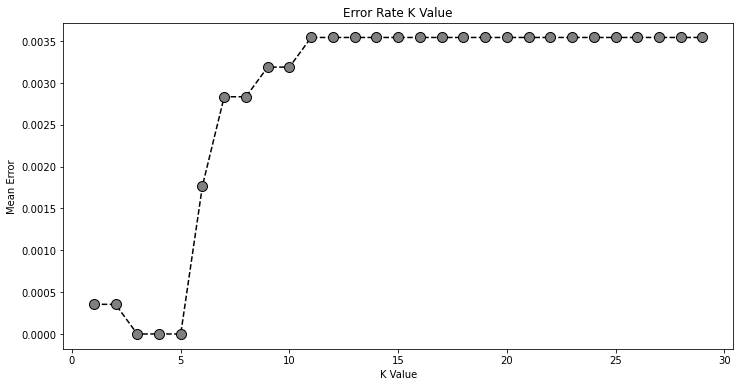

In [21]:
find_neighbours(X_train, y_train, X_test, y_test)

In [15]:
# 3 is the lowest k with a mean error of 0.00
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1888
           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00       560
           3       1.00      1.00      1.00        96

    accuracy                           1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822



We have flawless scores for predicting stalk roots with this algorithm! Despite this, there are 6 possible values for stalk root from the dictionary, lets see if we can use our unsupervised dataset to establish this distribution in the data.

# Unsupervised datasets
## Feature engineer

In [16]:
# OHE features (avoids creating any ordinal relationships with variables like with label encoding) 
og_cols = list(missing_stalk_root.columns)
rmv_cols = ['stalk_root']
keep_cols = [col for col in og_cols if col not in rmv_cols]

mushies_ohe_unsupervised = pd.get_dummies(missing_stalk_root.drop(columns = rmv_cols, axis = 1), columns = keep_cols)

In [17]:
mushies_ohe_unsupervised.head()

,class_edible,class_poisonous,cap_shape_bell,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_surface_fibrous,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_paths,habitat_waste,habitat_woods
3984,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4023,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4076,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4100,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4104,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


## Modelling with K-Means
### Using only observations with missing stalk root 

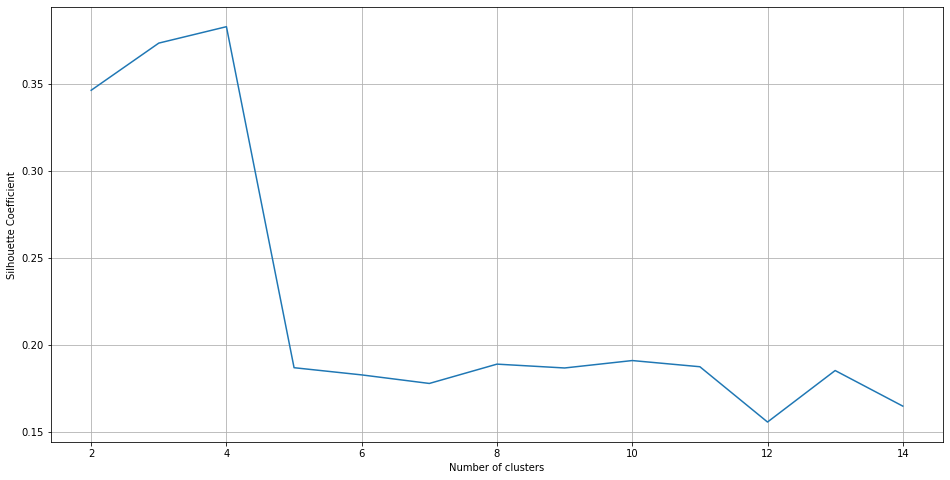

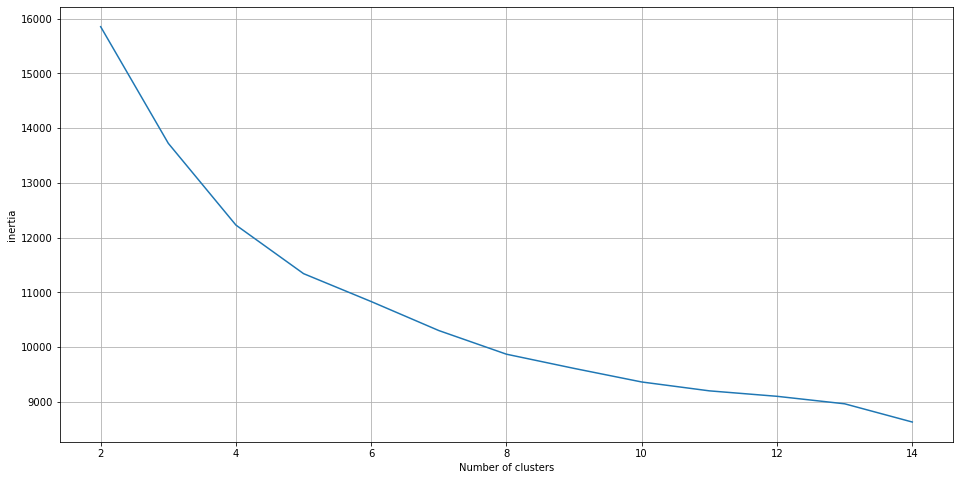

In [24]:
find_clusters(2,15,mushies_ohe_unsupervised)

In [27]:
# silhouette plot peaks at 4 and the elbow in the second plot is also at 4. This means the data doesnt represent
# all 6 labels in the dictionary
kmns = KMeans(n_clusters = 4, random_state = 124).fit(mushies_ohe_unsupervised)

## Using existing stalk roots as a feature

In [29]:
# OHE features
# og_cols = list(with_stalk_root.columns)
# mushies_full_ohe = pd.get_dummies(mushies, columns = og_cols)
# find_clusters(2, 15, mushies_full_ohe)

In [30]:
# silhouette score peaks at 9 but there are not 9 different labels. The elbow is at 4 again.
# kmns_full = KMeans(n_clusters = 9, random_state = 124).fit(mushies_full_ohe)
# mushies['kmns_stalk_root'] = pd.Series(kmns_full.labels_)

# Imputing nulls with models
Now we have a set of models lets use them to predict what our missing values in stalk root could be.

### Feature engineer to predict on supervised dataset

In [31]:
# OHE
og_cols = list(missing_stalk_root.columns)
rmv_cols = ['stalk_root']
keep_cols = [col for col in og_cols if col not in rmv_cols]

missing_ohe = pd.get_dummies(missing_stalk_root.drop(columns = rmv_cols, axis = 1), columns = keep_cols)

In [32]:
# Remove columns that aren't needed because they weren't used in model training
del_cols = list(set(missing_ohe.columns).difference(set(mushies_ohe_supervised.columns)))
missing_ohe.drop(columns = del_cols, axis = 1, inplace = True)

# Add columns that are needed but arent represented in this data
empty_cols = list(set(mushies_ohe_supervised.columns) - set(missing_ohe.columns))
for col in empty_cols:
    missing_ohe[col] = 0

### Predict with KNN

In [33]:
# Predict
stalk_root_predict = pd.DataFrame(knn.predict(missing_ohe), columns = ['stalk_root'], index = missing_stalk_root.index)

In [34]:
# Map predictions from numbers to words
stalk_root_predict['stalk_root'] = stalk_root_predict['stalk_root'].map(integer_mapping)

In [35]:
# Append column to data frame
missing_stalk_root['knn_stalk_root'] = stalk_root_predict['stalk_root']

### Predict with KMeans

In [37]:
# Append predictions to data frame, there is no way to map this to labels. 
# We would have to analyse the clusters individually and see what label it would correspond to.
missing_stalk_root['kmns_stalk_root'] = kmns.labels_

In [38]:
missing_stalk_root.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,knn_stalk_root,kmns_stalk_root
3984,edible,convex,scaly,buff,bruises,none,free,close,broad,red,...,red,white,white,two,evanescent,white,clustered,waste,equal,3
4023,poisonous,convex,scaly,red,no,fishy,free,close,narrow,buff,...,white,white,white,one,evanescent,white,several,paths,bulbous,0
4076,edible,flat,scaly,purple,no,none,free,close,narrow,chocolate,...,white,white,white,one,flaring,chocolate,solitary,woods,equal,3
4100,poisonous,convex,scaly,red,no,fishy,free,close,narrow,buff,...,pink,pink,white,one,evanescent,white,several,woods,bulbous,0
4104,poisonous,convex,scaly,brown,no,foul,free,close,narrow,buff,...,pink,pink,white,one,evanescent,white,several,leaves,bulbous,0


In [ ]:
new_mushies = pd.concat([missing_stalk_root, with_stalk_root]).reset_index(drop = True)
new_mushies.to_csv('../Results/mushies_imputed.csv')